# Brief Analysis Indian Trade Data 

### Objectives:

1: Analyse the most imported and exported commodites.

2: Analyse the import and export difference (Trade Deficit/Surplus).

3: Analyse the countries with which Import/Export is maximum.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
export_df = pd.read_csv("/Users/Shared/Shyam/Datasets/india-trade-data/2018-2010_export.csv")
import_df = pd.read_csv("/Users/Shared/Shyam/Datasets/india-trade-data/2018-2010_import.csv")

### Overview

In [3]:
print('Overview of export data:\nHead:' , export_df.head() , '\nTail:' , export_df.tail() , sep = '\n')

Overview of export data:
Head:
   HSCode                                          Commodity  value  \
0       2                        MEAT AND EDIBLE MEAT OFFAL.   0.18   
1       3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.00   
2       4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...  12.48   
3       6  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...   0.00   
4       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   1.89   

           country  year  
0  AFGHANISTAN TIS  2018  
1  AFGHANISTAN TIS  2018  
2  AFGHANISTAN TIS  2018  
3  AFGHANISTAN TIS  2018  
4  AFGHANISTAN TIS  2018  

Tail:
        HSCode                                          Commodity  value  \
137018      95  TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...   0.03   
137019      96               MISCELLANEOUS MANUFACTURED ARTICLES.   0.45   
137020      97      WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.   0.00   
137021      98                  PROJECT GOODS; SOME SPECIAL USES.   0

In [4]:
print('Overview of import data:\nHead:' , import_df.head() , '\nTail:' , import_df.tail() , sep = '\n')

Overview of import data:
Head:
   HSCode                                          Commodity   value  \
0       5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    0.00   
1       7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   12.38   
2       8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...  268.60   
3       9                      COFFEE, TEA, MATE AND SPICES.   35.48   
4      11  PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...     NaN   

           country  year  
0  AFGHANISTAN TIS  2018  
1  AFGHANISTAN TIS  2018  
2  AFGHANISTAN TIS  2018  
3  AFGHANISTAN TIS  2018  
4  AFGHANISTAN TIS  2018  

Tail:
       HSCode                                          Commodity  value  \
93090      81      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.   0.14   
93091      82  TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...   0.00   
93092      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...    NaN   
93093      85  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...   

In [5]:
#Checking datatypes of export data
print('Datatypes - Export:\n' , export_df.dtypes , sep = '\n')
print('Datatypes - Import:\n' , import_df.dtypes , sep = '\n')

Datatypes - Export:

HSCode         int64
Commodity     object
value        float64
country       object
year           int64
dtype: object
Datatypes - Import:

HSCode         int64
Commodity     object
value        float64
country       object
year           int64
dtype: object


In [6]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [7]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [8]:
print('No. of countries imported from:' , len(import_df['country'].unique()))
print('No. of countries exported to:' , len(export_df['country'].unique()))
print('No. of commodities imported:' , len(import_df['Commodity'].unique()))
print('No. of commodities exported:' , len(export_df['Commodity'].unique()))

No. of countries imported from: 242
No. of countries exported to: 248
No. of commodities imported: 98
No. of commodities exported: 98


#### It is interesting to note the number of countries. Including territories, the UN recognises only 241 countries. India seemingly exports to 248 countries, which is 7 more than the number recongnised by the UN. 

### Data Cleaning

In [9]:
#Checking for missing vlaues
print('Missing values in import data:' , import_df.isnull().sum() , sep = '\n')
print()
print('Missing values in export data:' , export_df.isnull().sum() , sep = '\n')

Missing values in import data:
HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

Missing values in export data:
HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64


In [10]:
print('Duplicates in import data:' , import_df.duplicated().sum())
print('Duplicates in export data:' , export_df.duplicated().sum())

Duplicates in import data: 18002
Duplicates in export data: 0


In [11]:
#Function to clean data
def cleanup(df):
    df.drop_duplicates(keep = 'first' , inplace = True)
    df.dropna(inplace = True)

In [12]:
cleanup(import_df)
cleanup(export_df)

In [13]:
print('Duplicates in import data after cleaning:' , import_df.duplicated().sum())
print('Duplicates in export data after cleaning:' , export_df.duplicated().sum())
print()
print('Missing values in import data after cleaning:' , import_df.isnull().sum() , sep = '\n')
print()
print('Missing values in export data after cleaning:' , export_df.isnull().sum() , sep = '\n')

Duplicates in import data after cleaning: 0
Duplicates in export data after cleaning: 0

Missing values in import data after cleaning:
HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

Missing values in export data after cleaning:
HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64


In [14]:
#Statistical summary of import data

import_df.describe()

,HSCode,value,year
count,63677.000000,63677.000000,63677.000000
mean,53.647612,62.707420,2014.009611
std,27.344631,669.801894,2.605673
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.370000,2014.000000
75%,78.000000,4.780000,2016.000000
max,99.000000,32781.570000,2018.000000


#### There is a huge outlier in the value since 75% of values are below 4.8 and maximum value is 32781.57

In [15]:
#Statistical summary of export data

export_df.describe()

,HSCode,value,year
count,122985.000000,122985.000000,122985.000000
mean,51.288669,21.567829,2014.065366
std,27.814548,229.701279,2.581142
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


#### Similar to the import data, there is an outlier here as well since 75% of values are below 3.8 and maximum is 19805.17

### Most Imported and Exported Commodities

In [16]:
df_icom = import_df.groupby('HSCode').agg({'value' : 'sum'})
df_icom = df_icom.sort_values('value' , ascending = False).head(10)
df_icom.index = df_icom.index.astype('str')
df_ecom = export_df.groupby('HSCode').agg({'value' : 'sum'})
df_ecom = df_ecom.sort_values('value' , ascending = False).head(10)
df_ecom.index = df_ecom.index.astype('str')

In [17]:
print('Most Imported:' , df_icom.head() , sep = '\n')
print('\nMost Exported:' , df_ecom.head() , sep = '\n')

Most Imported:
             value
HSCode            
27      1308092.61
71       622605.18
85       327040.84
84       310812.43
29       150259.39

Most Exported:
            value
HSCode           
27      434594.81
71      383341.86
87      124502.75
84      123810.69
29      113008.98


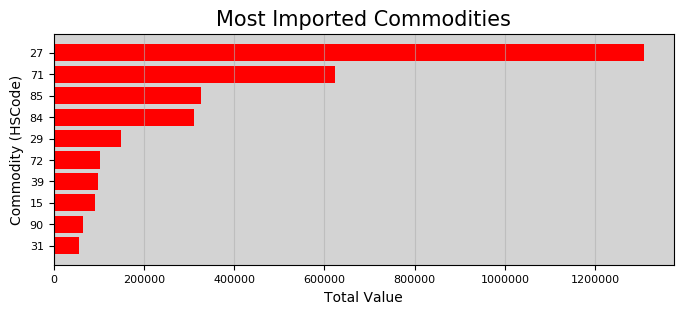

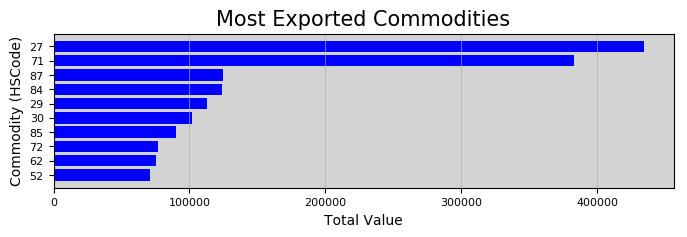

In [18]:
#Plotting Data

plt.rcdefaults()

fig, ax = plt.subplots(figsize = (8 , 3))
ax.barh(df_icom.index , df_icom.value , align = 'center' , color = 'r')
ax.invert_yaxis()
ax.tick_params(axis = 'y' , labelsize = 8)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.set_title('Most Imported Commodities' , fontsize = 15)
ax.set_ylabel('Commodity (HSCode)' , fontsize = 10)
ax.set_xlabel('Total Value' , fontsize = 10)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

fig, ax = plt.subplots(figsize = (8 , 2))
ax.barh(df_ecom.index , df_ecom.value , align = 'center' , color = 'b')
ax.invert_yaxis()
ax.tick_params(axis = 'y' , labelsize = 8)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.set_title('Most Exported Commodities' , fontsize = 15)
ax.set_ylabel('Commodity (HSCode)' , fontsize = 10)
ax.set_xlabel('Total Value' , fontsize = 10)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

plt.show()

#### Per the plots, the top 2 exported commodities have much more value than the remaining top commodities. 

#### Also, HSCode 27 & 71 are the top 2 most imported as well as exported commodites.

HSCode 27 : Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes.

HSCode 71 : Natural or cultured pearls, precious or semi-precious stones, preciousmetals, metals clad with precious metal and articles thereof; immitation jewellery; coin.

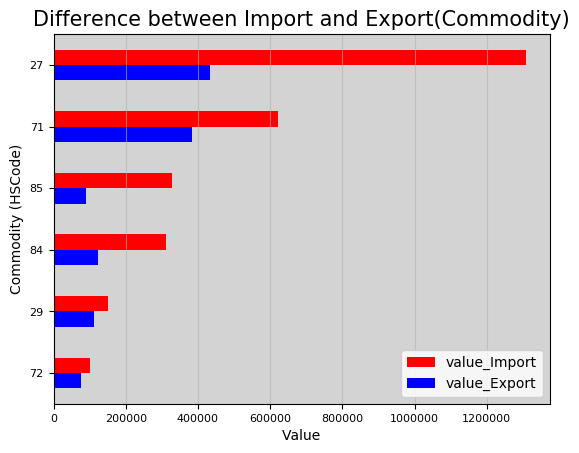

In [19]:
#Plotting a chart of common top import and export items

common = pd.merge(df_icom , df_ecom , on = 'HSCode' , suffixes = ('_Import' , '_Export'))

ax = common.plot.barh(color = ['red' , 'blue'])

ax.invert_yaxis()
ax.set_title('Difference between Import and Export(Commodity)' , fontsize = 15)
ax.set_xlabel('Value' , fontsize = 10)
ax.set_ylabel('Commodity (HSCode)' , fontsize = 10)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.tick_params(axis = 'y' , labelsize = 8)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

plt.show()

#### It is clear that most of the top commodities have greater import value than export value. This shows that India is at a trade deficit with the top commodities.

### Trade Deficit/Surplus

In [20]:
#Grouping Data and adding to new DataFrame

import_val = import_df.groupby('year').agg({'value' : 'sum'})
export_val = export_df.groupby('year').agg({'value' : 'sum'})
diff = pd.merge(import_val , export_val , on = 'year' , suffixes = ('_Import' , '_Export'))
diff['Difference'] = diff['value_Export'] - diff['value_Import']
print('Yearly Deficit/Surplus:\n' , diff.head() , sep = '\n')

Yearly Deficit/Surplus:

      value_Import  value_Export  Difference
year                                        
2010     369762.25     249801.18  -119961.07
2011     489311.81     305948.28  -183363.53
2012     490730.07     300384.32  -190345.75
2013     450192.99     314388.61  -135804.38
2014     448026.63     310321.02  -137705.61


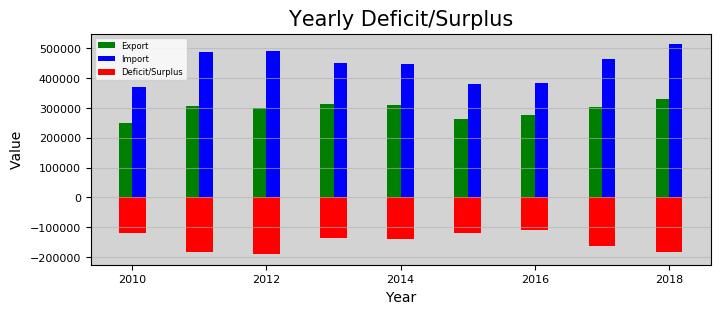

In [21]:
#Plotting Data

fig , ax = plt.subplots(figsize = (8 , 3))

ax.bar(diff.index - 0.2 , diff['value_Export'] , width = 0.2 , color = 'g' , align = 'edge' , label = 'Export')
ax.bar(diff.index , diff['value_Import'] , width = 0.2 , color = 'b' , align = 'edge' , label = 'Import')
ax.bar(diff.index , diff['Difference'] , width = 0.4 , color = 'r' , label = 'Deficit/Surplus')

ax.set_title('Yearly Deficit/Surplus' , fontsize = 15)
ax.set_xlabel('Year' , fontsize = 10)
ax.set_ylabel('Value' , fontsize = 10)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.tick_params(axis = 'y' , labelsize = 8)
ax.legend(loc = 2 , prop = {'size' : '6'})
ax.grid(axis = 'y' , alpha = 0.6)
ax.set_facecolor('lightgrey')


plt.show()

#### From 2010 to 2018 India has been making more imports than export, implying a trade deficit. The plot also shows the deficit increased from 2010 to 2012, decreased from 2012 to 2016 and increased again till 2018. 

#### We can observe an S like curve in the deficit. Data from earlier years is required to check whether there is any cyclical pattern. 

### Country Wise Import/Export

In [22]:
df_ictr = import_df.groupby('country').agg({'value' : 'sum'})
df_ictr = df_ictr.sort_values('value' , ascending = False).head(10)

df_ectr = export_df.groupby('country').agg({'value' : 'sum'})
df_ectr = df_ectr.sort_values('value' , ascending = False).head(10)

print('Countries most imported from:' , df_ictr.head() , sep = '\n')
print('\nCountries most exported to:' , df_ectr.head() , sep = '\n')

Countries most imported from:
                 value
country               
CHINA P RP   532177.51
U ARAB EMTS  256286.08
SAUDI ARAB   241554.99
U S A        219276.66
SWITZERLAND  206729.03

Countries most exported to:
                 value
country               
U S A        360609.57
U ARAB EMTS  289374.88
CHINA P RP   121806.00
HONG KONG    115693.35
SINGAPORE    101679.70


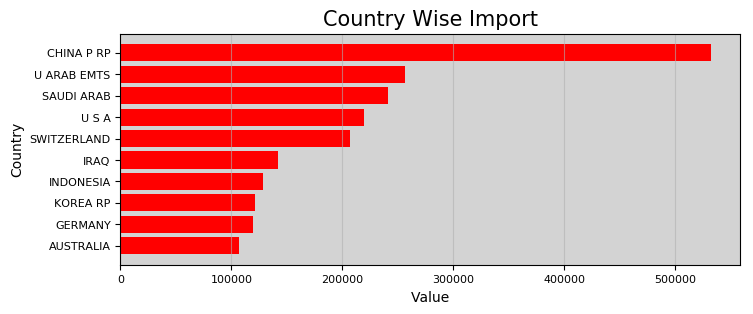

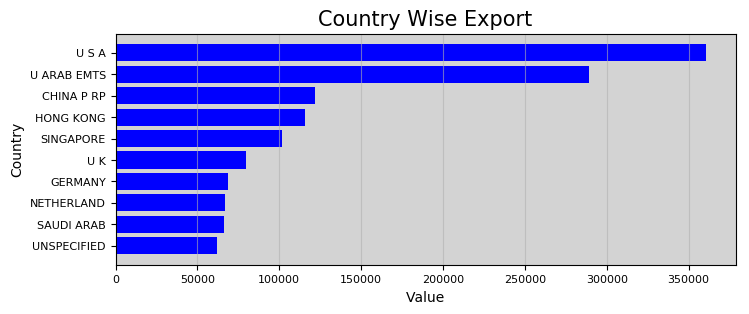

In [23]:
fig , ax = plt.subplots(figsize = (8 , 3))
ax.barh(df_ictr.index , df_ictr.value , color = 'r')
ax.invert_yaxis()
ax.set_title('Country Wise Import' , fontsize = 15)
ax.set_xlabel('Value' , fontsize = 10)
ax.set_ylabel('Country' , fontsize = 10)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.tick_params(axis = 'y' , labelsize = 8)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')


fig , ax = plt.subplots(figsize = (8 , 3))
ax.barh(df_ectr.index , df_ectr.value , color = 'b')
ax.invert_yaxis()
ax.set_title('Country Wise Export' , fontsize = 15)
ax.set_xlabel('Value' , fontsize = 10)
ax.set_ylabel('Country' , fontsize = 10)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.tick_params(axis = 'y' , labelsize = 8)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

plt.show()

#### Of the top coutries, the country with the 10th most export value is unspecified.  

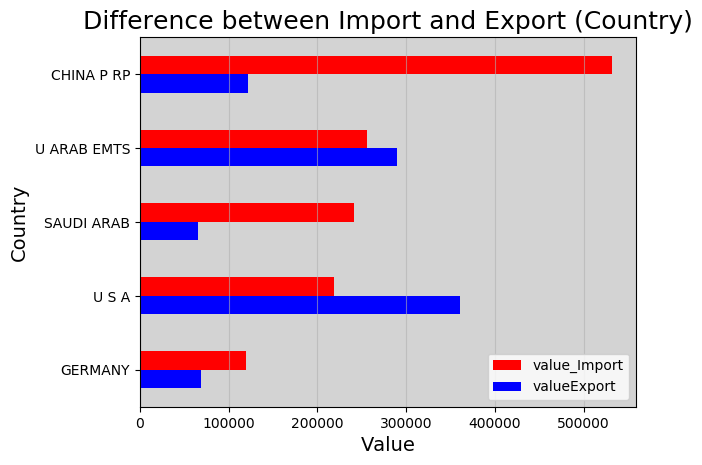

In [24]:
common_ctr = pd.merge(df_ictr , df_ectr , on = 'country' , suffixes = ('_Import' , 'Export'))

ax = common_ctr.plot.barh(color = ['red' , 'blue'])
ax.invert_yaxis()
ax.set_title('Difference between Import and Export (Country)' , fontsize = 18)
ax.set_xlabel('Value' , fontsize = 14)
ax.set_ylabel('Country' , fontsize = 14)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

plt.show()

#### There is a huge difference between imports and exports with China and USA, showing India is at a trade deficit with China, and trade surplus with USA. UAE also shows trade surplus.

In [25]:
#Analysing most imported commodities from China

china_import = import_df[import_df['country'] == 'CHINA P RP']
china_import = china_import.groupby('HSCode').agg({'value' : 'sum'})
china_import = china_import.sort_values('value' , ascending = False).head(10)
china_import.index = china_import.index.astype('str')
china_import.head()

,value
HSCode,
85,162033.10
84,96049.07
29,52280.81
31,19837.60
98,18465.48


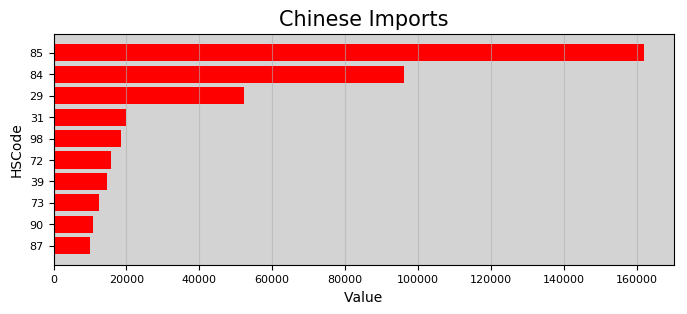

In [26]:
fig , ax = plt.subplots(figsize = (8 , 3))
ax.barh(china_import.index , china_import.value , color = 'r')
ax.invert_yaxis()
ax.set_title('Chinese Imports' , fontsize = 15)
ax.set_xlabel('Value' , fontsize = 10)
ax.set_ylabel('HSCode' , fontsize = 10)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.tick_params(axis = 'y' , labelsize = 8)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

plt.show()

#### HSCode 85 & 84 are the two most imported commodities from China. The following are the worldwide totals:

#### 85: 327040.85. This implies that 49.5% of the imports are from China.
#### 84: 310812.43. 30.9% of the imports are from China.

HSCode 85: ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.

HSCode 84: NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.

In [27]:
#Analysing most exported commodities to USA

us_export = export_df[export_df['country'] == 'U S A']
us_export = us_export.groupby('HSCode').agg({'value' : 'sum'})
us_export = us_export.sort_values('value' , ascending = False).head(10)
us_export.index = us_export.index.astype('str')
us_export.head()

,value
HSCode,
71,74002.62
30,34856.28
27,20822.49
63,18991.17
84,18885.94


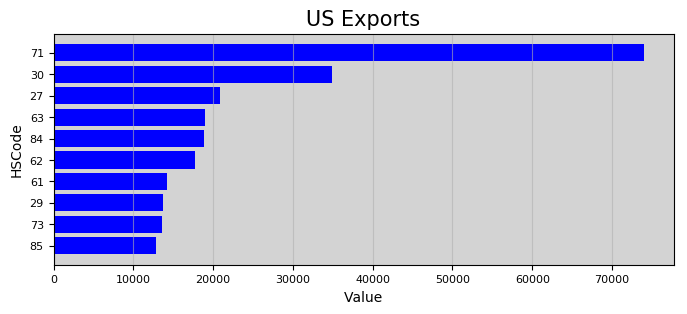

In [28]:
fig , ax = plt.subplots(figsize = (8 , 3))
ax.barh(us_export.index , us_export.value , color = 'b')
ax.invert_yaxis()
ax.set_title('US Exports' , fontsize = 15)
ax.set_xlabel('Value' , fontsize = 10)
ax.set_ylabel('HSCode' , fontsize = 10)
ax.tick_params(axis = 'x' , labelsize = 8)
ax.tick_params(axis = 'y' , labelsize = 8)
ax.grid(axis = 'x' , alpha = 0.6)
ax.set_facecolor('lightgrey')

plt.show()

#### HSCode 71 & 30 are the most two exported commodities to USA. The following are the worldwide totals:

#### 71: 383341.86. 19.3% of the total exports are to the USA.
#### 30: 101792.69.  34.24% of the total exports are to the USA.

HSCode 71: NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.

HSCode 30:  PHARMACEUTICAL PRODUCTS